In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()
import warnings
warnings.filterwarnings('ignore') 
from wordcloud import WordCloud, STOPWORDS

In [2]:
!pip install -q -U --pre pycaret

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you have joblib 1.2.0 which is incompatible.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.2 which is incompatible.


In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart_disease_dataset.csv')

# Let's go_O

In [4]:
df

age   BP  cholestrol  heart disease
0     70  130         322              1
1     67  115         564              0
2     57  124         261              1
3     64  128         263              0
4     74  120         269              0
..   ...  ...         ...            ...
265   52  172         199              0
266   44  120         263              0
267   56  140         294              0
268   57  140         192              0
269   67  160         286              1

[270 rows x 4 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   BP             270 non-null    int64
 2   cholestrol     270 non-null    int64
 3   heart disease  270 non-null    int64
dtypes: int64(4)
memory usage: 8.6 KB


In [6]:
df.isna().sum()

age              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [7]:
df.nunique()

age               41
BP                47
cholestrol       144
heart disease      2
dtype: int64

In [8]:
df.describe()

age          BP  cholestrol  heart disease
count  270.000000  270.000000  270.000000     270.000000
mean    54.433333  131.344444  249.659259       0.444444
std      9.109067   17.861608   51.686237       0.497827
min     29.000000   94.000000  126.000000       0.000000
25%     48.000000  120.000000  213.000000       0.000000
50%     55.000000  130.000000  245.000000       0.000000
75%     61.000000  140.000000  280.000000       1.000000
max     77.000000  200.000000  564.000000       1.000000

# Pairplot of everything

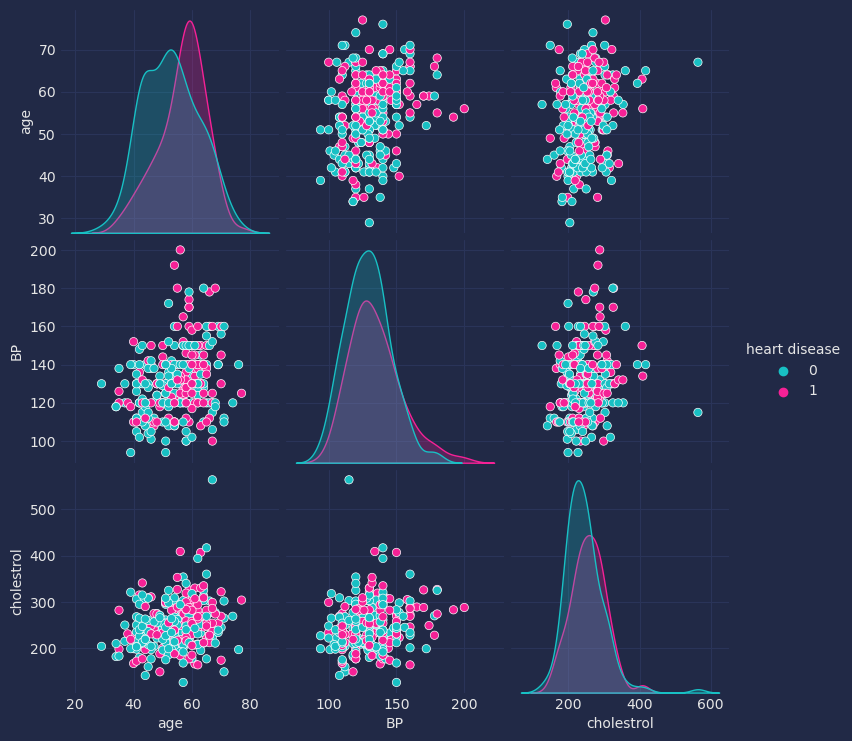

In [9]:
sns.pairplot(df, hue='heart disease')
plt.show()

# Exploratory data analysis

In [10]:
df['age'].value_counts()

54    16
58    15
51    12
57    12
59    12
60    12
52    11
62    11
44    10
41     9
56     9
64     9
65     8
67     8
42     8
53     7
63     7
61     7
46     7
45     7
48     7
43     7
50     7
55     6
66     6
49     5
70     4
47     4
40     3
71     3
39     3
35     3
69     3
68     3
37     2
34     2
76     1
74     1
38     1
77     1
29     1
Name: age, dtype: int64

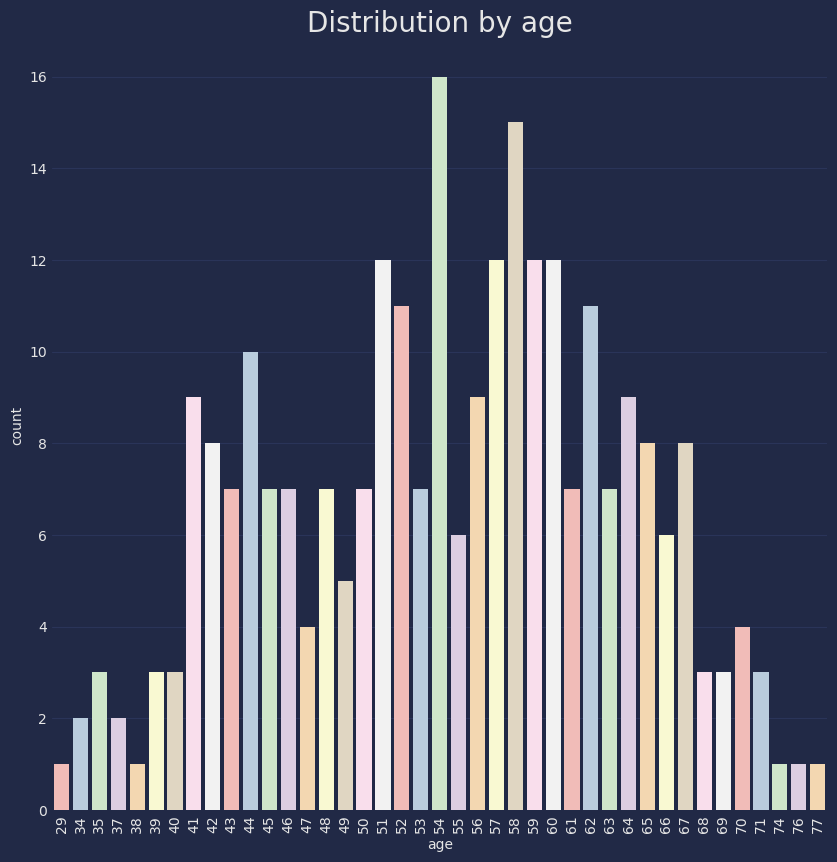

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='age', palette='Pastel1')
plt.xticks(rotation=90)
plt.title('Distribution by age',fontsize = 20)
plt.show()

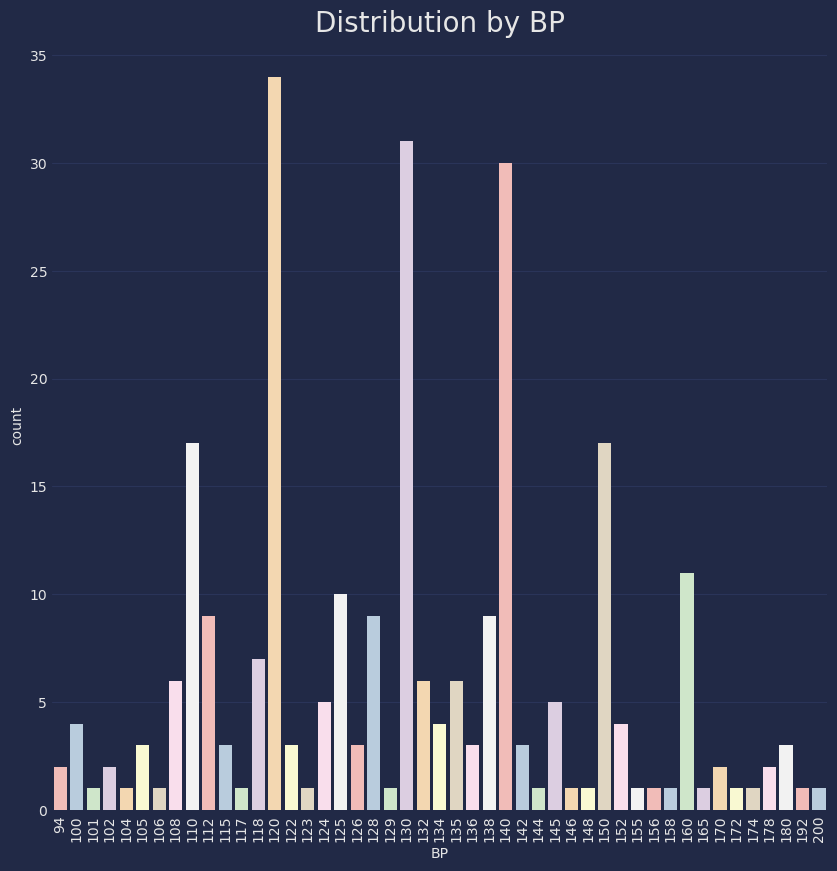

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='BP', palette='Pastel1')
plt.xticks(rotation=90)
plt.title('Distribution by BP',fontsize = 20)
plt.show()

In [13]:
df['BP'].value_counts()

120    34
130    31
140    30
110    17
150    17
160    11
125    10
138     9
112     9
128     9
118     7
132     6
135     6
108     6
124     5
145     5
134     4
100     4
152     4
180     3
136     3
115     3
105     3
126     3
122     3
142     3
94      2
102     2
178     2
170     2
104     1
200     1
155     1
101     1
129     1
123     1
192     1
117     1
158     1
146     1
156     1
165     1
174     1
144     1
106     1
148     1
172     1
Name: BP, dtype: int64

In [14]:
df['cholestrol'].mean()

249.65925925925927

In [15]:
df['cholestrol'].median()

245.0

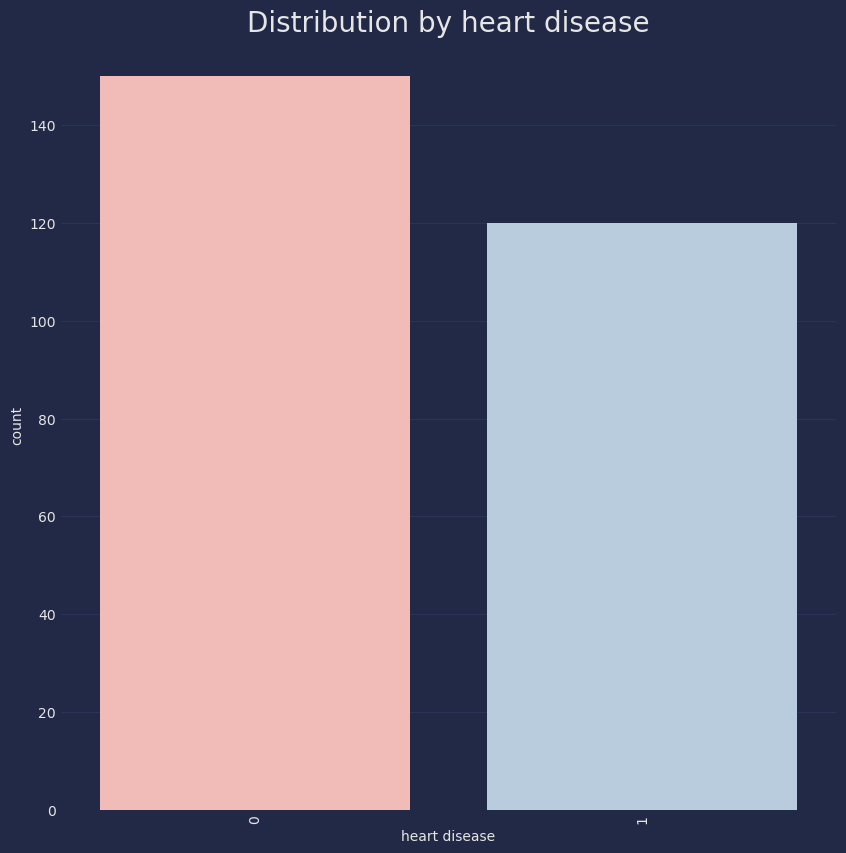

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(data=df,x='heart disease', palette='Pastel1')
plt.xticks(rotation=90)
plt.title('Distribution by heart disease',fontsize = 20)
plt.show()

In [17]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [18]:
fig = px.violin(df, y='age', x='age', color='heart disease', box=True, points='all',hover_data=df.columns, width=1200, height=600 ,template='plotly_dark', title= 'Distribution by all parameters')
fig.show()

In [19]:
df.groupby('heart disease')['cholestrol'].agg(['mean','median'])

mean  median
heart disease                    
0              244.213333   236.0
1              256.466667   255.5

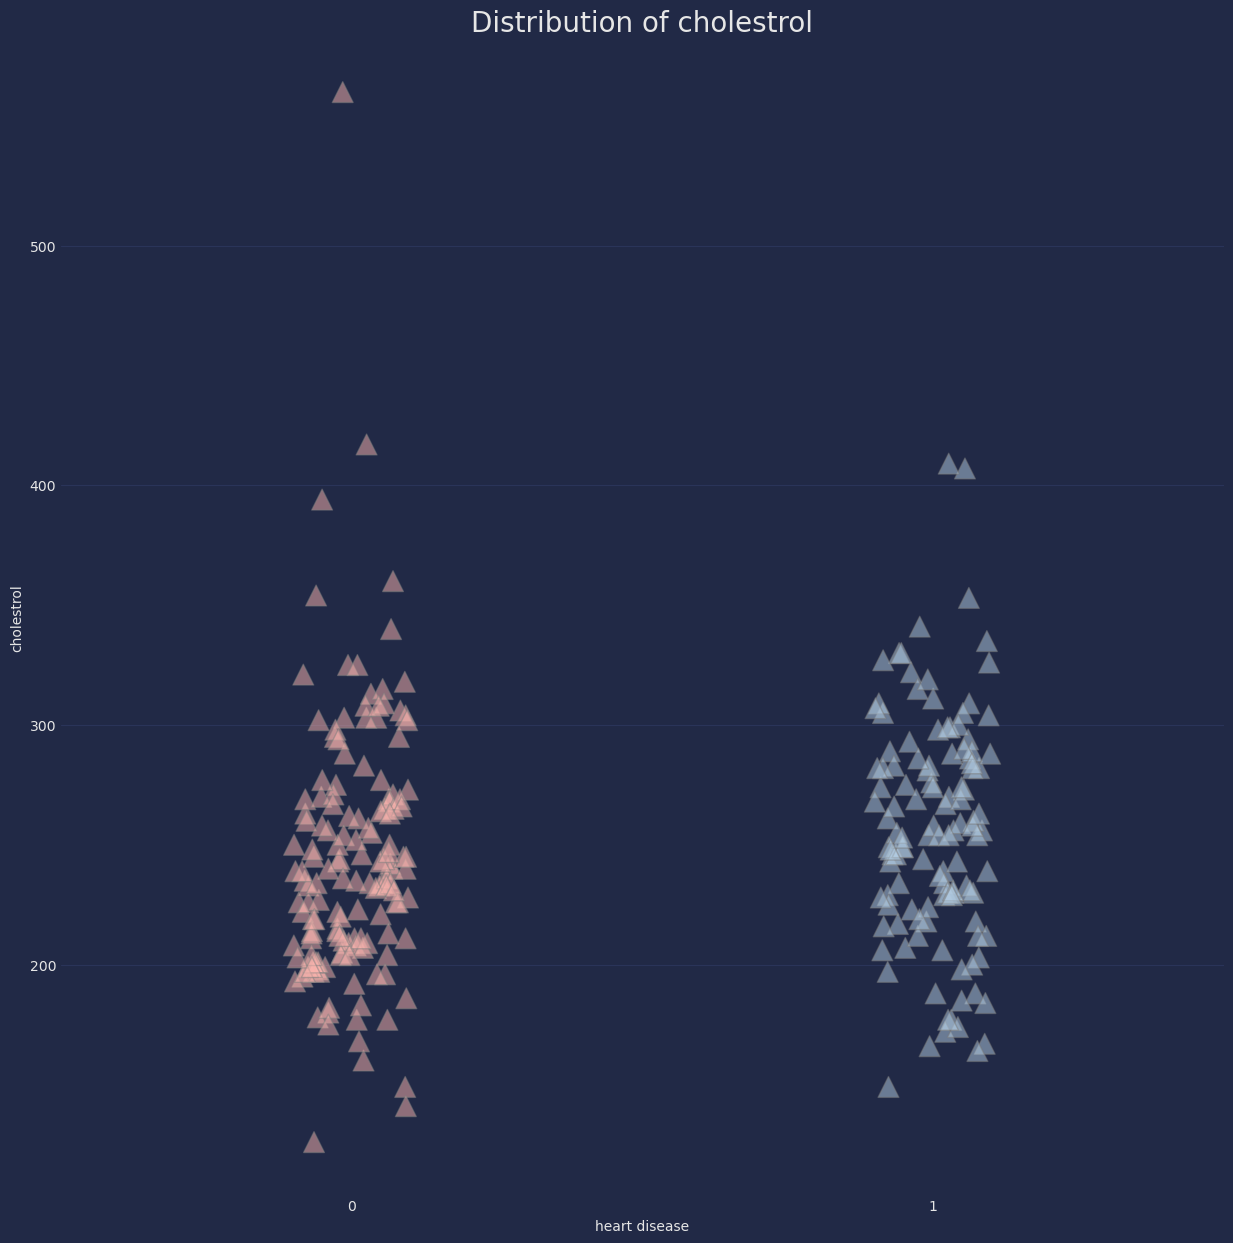

In [20]:
plt.subplots(figsize=(15,15))
sns.stripplot(y='cholestrol', x='heart disease', data=df, palette='Pastel1', s=15, marker='^', linewidth=1, alpha=0.5)
plt.title("Distribution of cholestrol",fontsize = 20)
plt.show()

In [21]:
x = df.drop('heart disease', axis = 1)
y = df['heart disease']

In [22]:
from pycaret.clustering import *
from sklearn.datasets import make_blobs

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [23]:
setup(df, session_id = 1337)

In [24]:
models()

Name  \
ID                                            
kmeans                   K-Means Clustering   
ap                     Affinity Propagation   
meanshift             Mean Shift Clustering   
sc                      Spectral Clustering   
hclust             Agglomerative Clustering   
dbscan     Density-Based Spatial Clustering   
optics                    OPTICS Clustering   
birch                      Birch Clustering   
kmodes                   K-Modes Clustering   

                                                   Reference  
ID                                                            
kmeans                        sklearn.cluster._kmeans.KMeans  
ap         sklearn.cluster._affinity_propagation.Affinity...  
meanshift              sklearn.cluster._mean_shift.MeanShift  
sc              sklearn.cluster._spectral.SpectralClustering  
hclust     sklearn.cluster._agglomerative.AgglomerativeCl...  
dbscan                        sklearn.cluster._dbscan.DBSCAN  
optics                        sklearn.cluster._optics.OPTICS  
birch                           sklearn.cluster._birch.Birch  
kmodes                                  kmodes.kmodes.KModes

In [25]:
model = create_model('kmeans')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

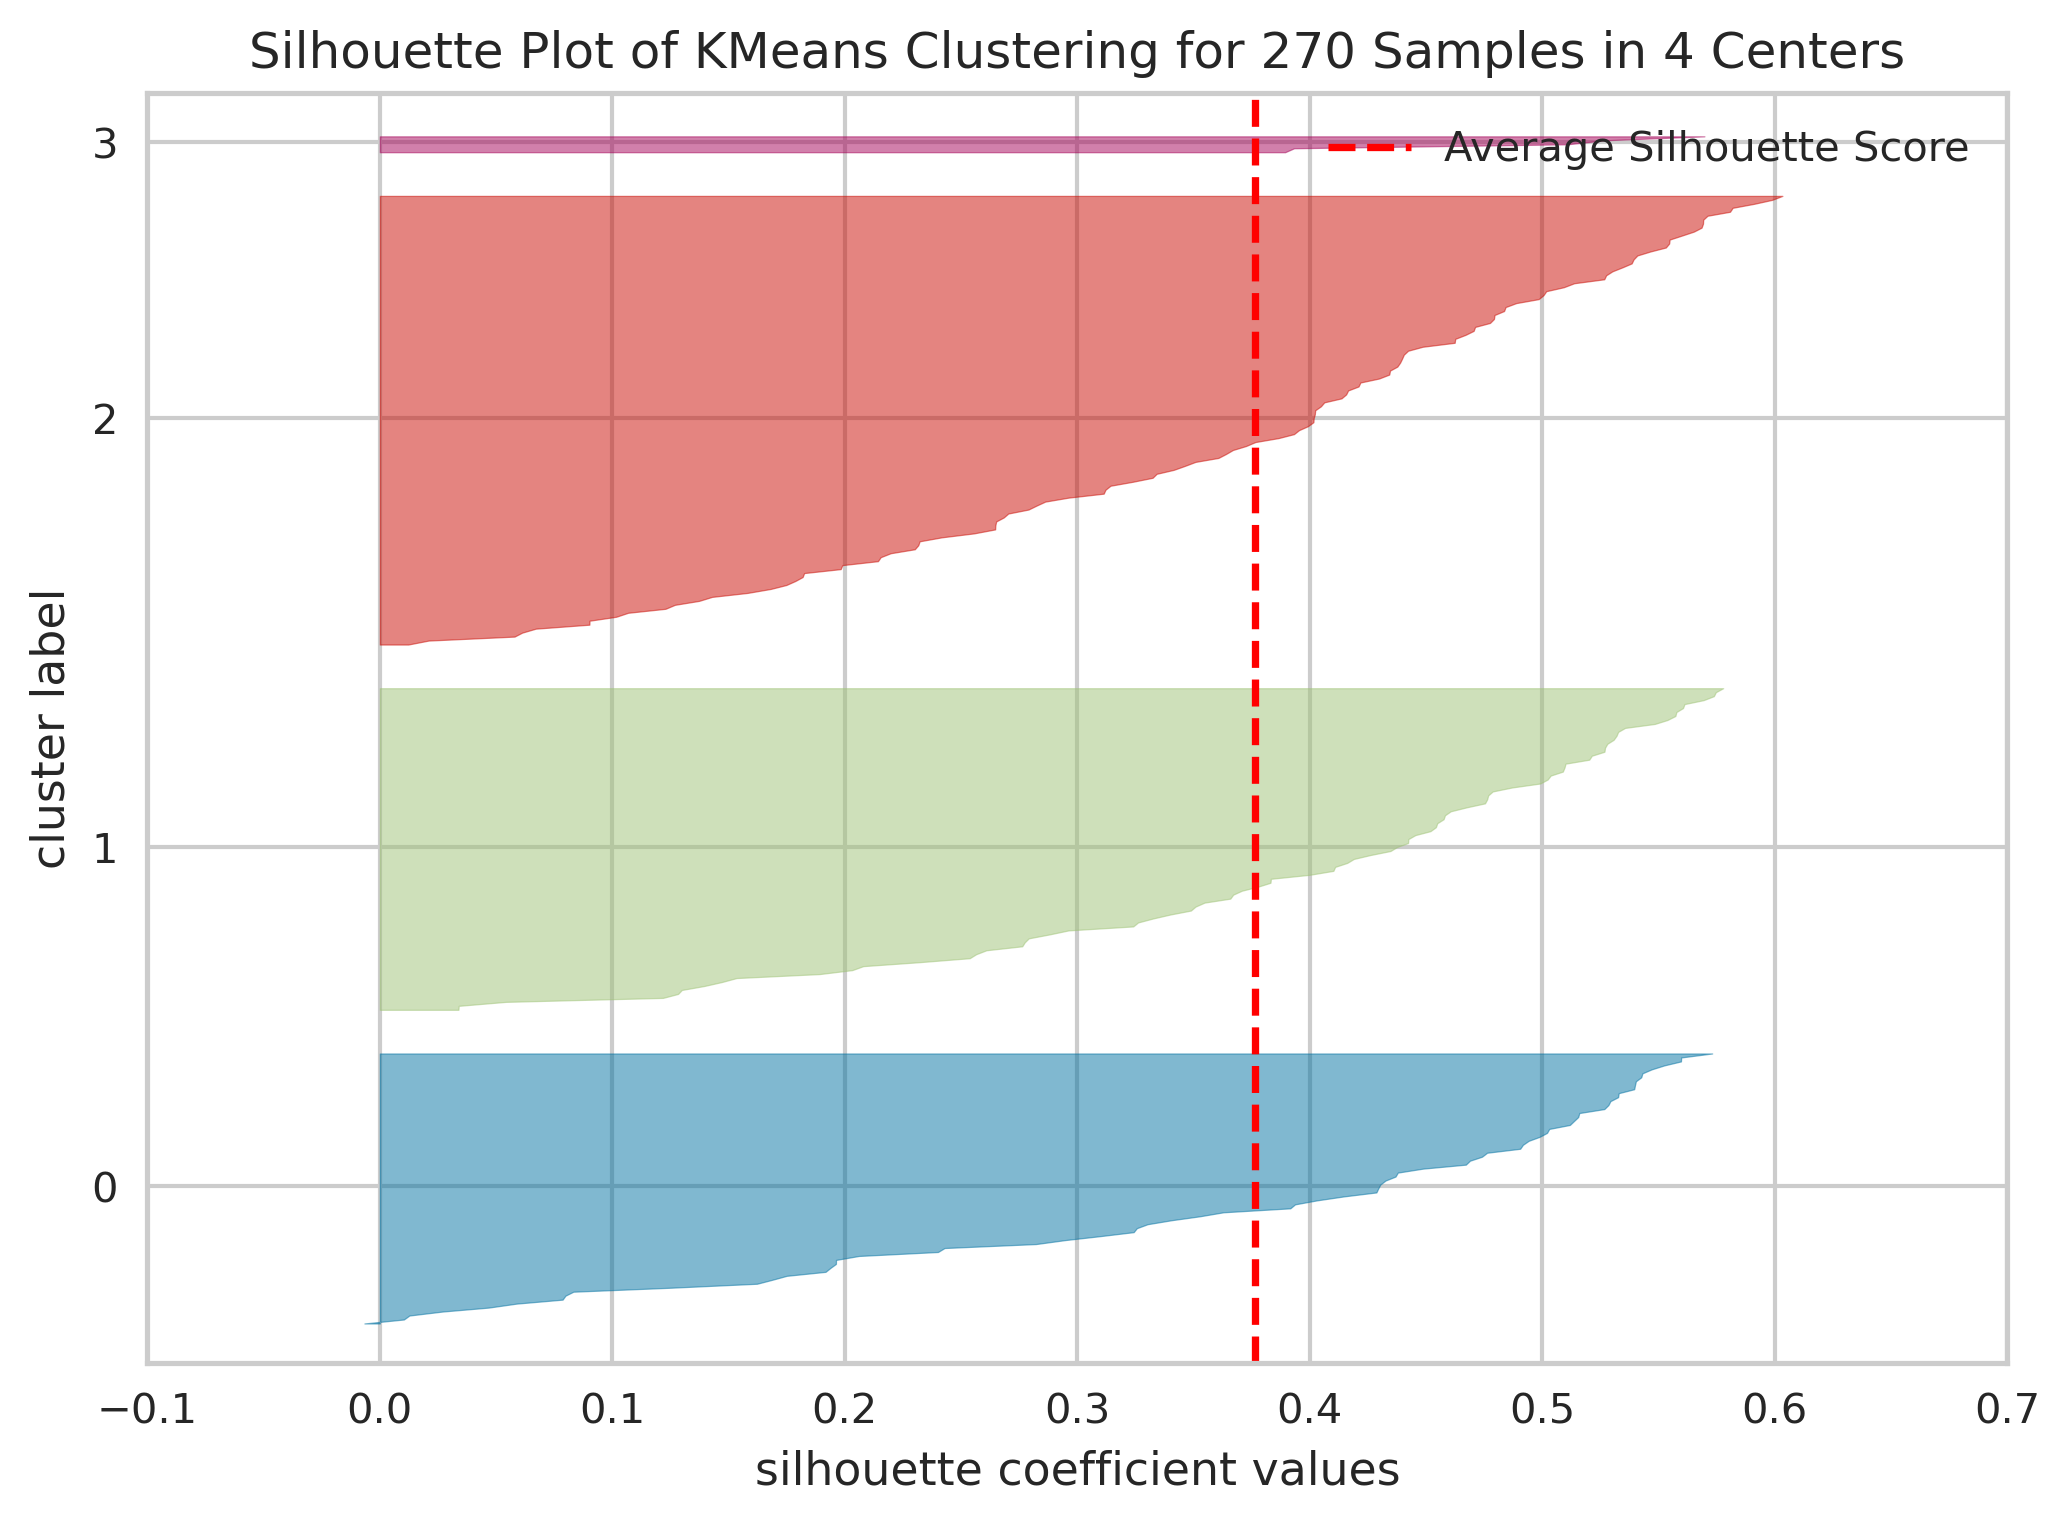

In [26]:
plot_model(model, 'silhouette')

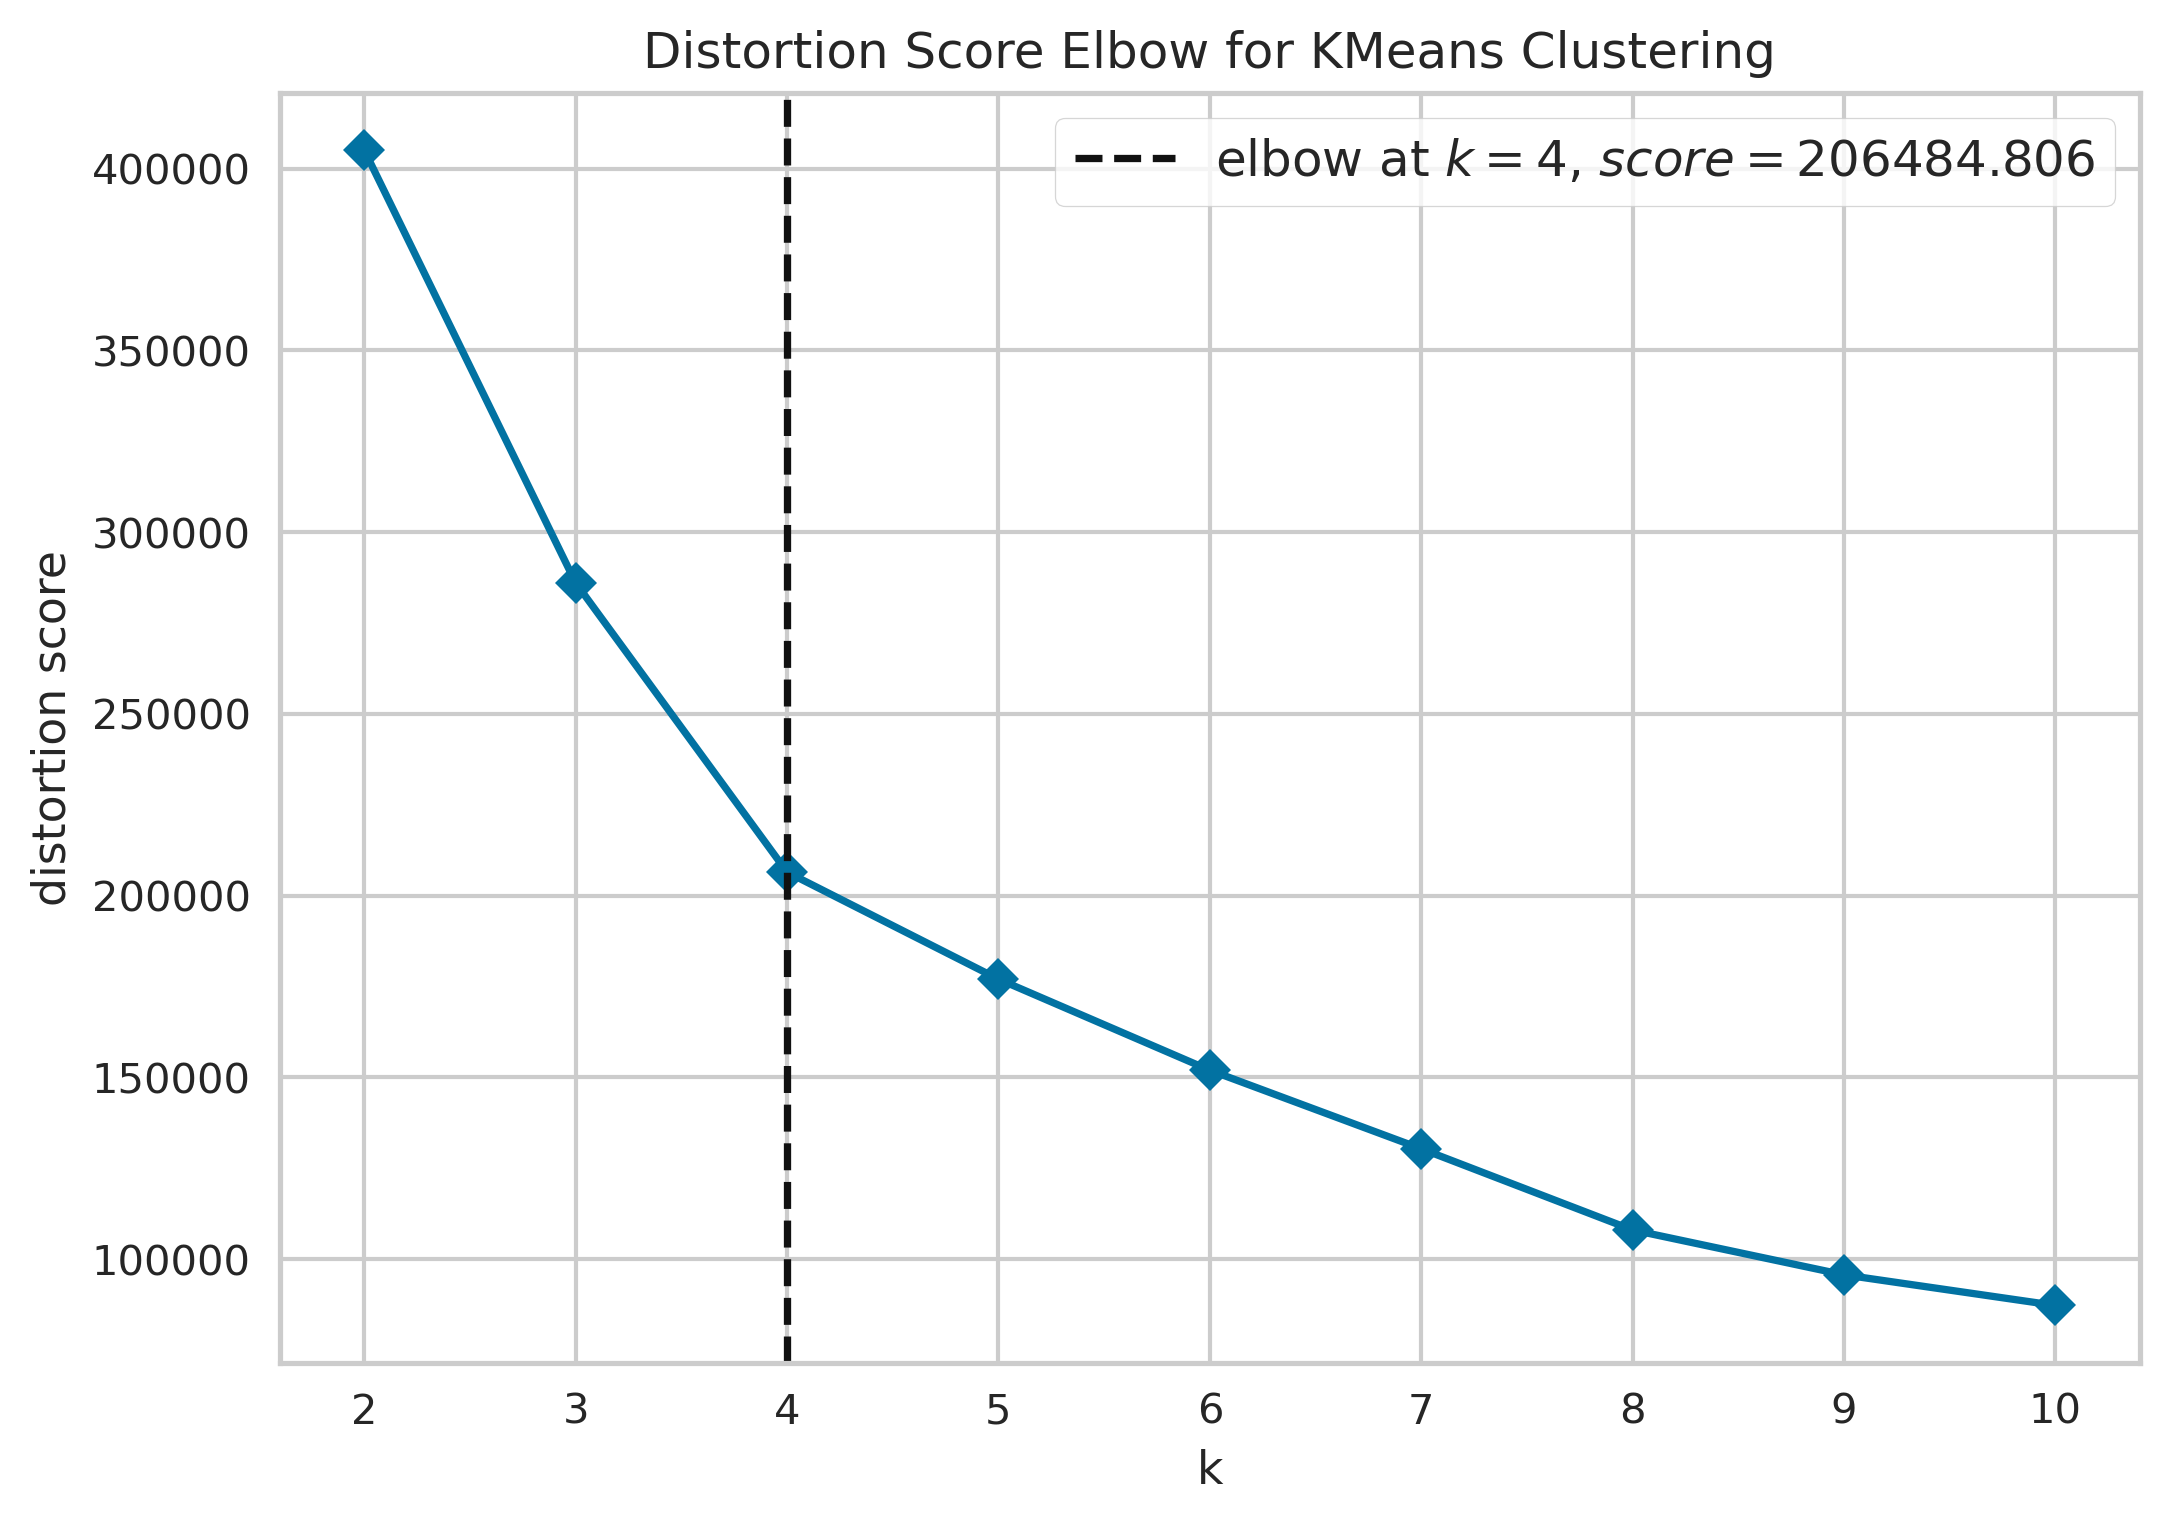

In [27]:
plot_model(model, 'elbow')

In [28]:
plot_model(model, 'tsne')

# Prediction

In [29]:
df1 = pd.get_dummies(data = df)

In [30]:
x = df1.drop('heart disease',axis=1)
y = df1['heart disease']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=43, test_size=0.2)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0,min_samples_leaf=10)

In [33]:
rfc.fit(x_train,y_train)

RandomForestClassifier(min_samples_leaf=10, random_state=0)

In [34]:
y_pred = rfc.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)

In [36]:
print('Accuracy:',accuracy)

Accuracy: 0.7037037037037037


# Hi, thank you so much for reading to the end, i just recently started doing analytics and your advice and comments are important to me. Don't forget to upvote this notebook if you like it!